This is Intro to AI coursework. Our model would classify and predict Salaries

Import the libraries that is needed for our model


In [2]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

import seaborn as sns

Import the csv file into pandas dataframe and remove any null values.


In [3]:
file = 'SE(madeup).csv'
sales_data = pd.read_csv(file, na_values=['NA', '?'])
df = sales_data.select_dtypes(include=['int', 'float'])
#Data Shape
print(df.shape)
#Data types
print(df.dtypes)
#Head of df
print(df.head)

(30, 7)
jobListingId                      int64
jobCategory-FullTime              int64
jobRemote                         int64
kilometerDistanceFromCentral    float64
Salary                            int64
EasyToApply                       int64
GraduateJob                       int64
dtype: object
<bound method NDFrame.head of     jobListingId  jobCategory-FullTime  ...  EasyToApply  GraduateJob
0     4209669018                 10132  ...            0            1
1     4159125761                 10132  ...            0            1
2     4201688830                 10146  ...            1            0
3     4262194486                 10132  ...            0            1
4     4269437731                 10132  ...            0            1
5     4217873931                 10132  ...            1            1
6     4145986740                 10138  ...            1            1
7     4211901773                 10041  ...            1            0
8     4242469950                 10049

Split our data into X and y to specify which colum we want to predict. X being our features and y being the colum we are predicting

-0.2455437816276782
   Actual     Predicted
0   51464  41012.125328
1   45509  40721.945010
2   38776  41277.365380
3   36928  40085.537285
4   41624  46979.992857
5   39584  38350.149415


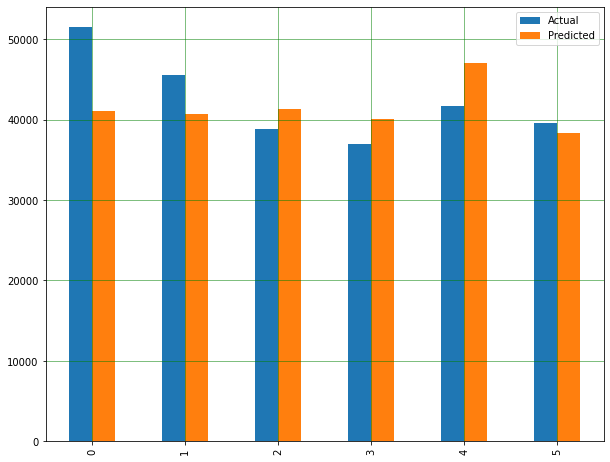

Mean: 42314.166666666664
Root Mean Squared Error: 5455.784344327331
Accuracy: 89.7 %.
-0.2455437816276782


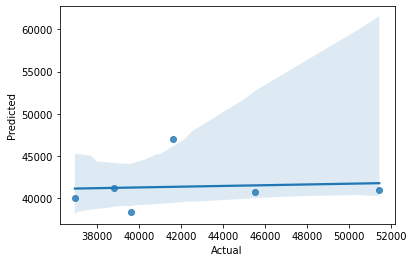

In [8]:
#arry of our features
result = []
for x in df.columns:
    if x != 'Salary':
        result.append(x)

#define X and y variables
X = df[result].values
y = df['Salary'].values

#split data into testing and training with a 80 20 split of train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Define our model and specify the hyperparamters and fit the model on training dataset
# clf = SVR(kernel='linear', epsilon=1034,gamma=3223, C=3000)
clf= RandomForestRegressor(n_estimators=15, max_depth=2, random_state=47, min_samples_split=4)
#fit the model
clf=clf.fit(X_train, y_train)
#check the score
print(clf.score(X_test, y_test))

#make a prediction for our test dataset and assign it to the variable
y_pred = clf.predict(X_test)


#build a new data frame with two columns, the actual values of the test data,
#and the predictions of the model
#see our predicted value with the actual value
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_head = df_compare.head(25)
print(df_head)


#python function, defined here to plot confusion matrices
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.05)
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# cm = confusion_matrix(y_test, y_pred)
# np.set_printoptions(precision=2)
# print('Confusion matrix, without normalization')
# print(cm)
# plt.figure()
# plot_confusion_matrix(cm, result, title='')

# #graphical plots of confusion matrix using method above
# cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# print('Normalized confusion matrix')
# print(cm_normalized)
# plt.figure()
# plot_confusion_matrix(cm_normalized, result, title='Normalized confusion matrix')
# plt.show()



df_head.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean:', np.mean(y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Performance metrics
errors = abs(y_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print(r2_score(y_test, y_pred))

df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.regplot(x='Actual', y='Predicted', data=df_compare);
# plt.show()


# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
